# Capstone Three - 2. Data Wrangling and EDA<a id='2'></a>

In this project, I study the problem of modeling past credit card transactions in order to determine which ones are fraudulent.

The credit card dataset used in this project:
1) It contains transactions made by credit cards in September 2013 by European cardholders. The transactions occurred in two days. 
2) The original features and more background information about the data are not provided. Features V1, V2, … V28 are the principal components obtained with PCA.
3) Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable (Target), and it takes value 1 in case of fraud and 0 otherwise. 

This nothebook contains the Data Wrangling and EDA steps. The Data Wrangling step focuses on preprocessing the credit card data, organizing it, and making sure it's well defined. The EDA step focuses on exploring the target and features, and preparing the data for modeling step.

## 2.1 Contents<a id='2.1'></a>
* [2. Data Wrangling and EDA](#2)
  * [2.1 Contents](#2.1)
  * [2.2 Imports](#2.2)
  * [2.3 Load Data](#2.3)
  * [2.4 Explore the Data](#2.4)
    * [2.4.1 Data Info](#2.4.1) 
    * [2.4.2 Data Visualization](#2.4.2)
      * [2.4.2.1 Target](#2.4.2.1)
      * [2.4.2.2 Feature correlation heatmap](#2.4.2.2)
      * [2.4.2.3 Scatterplots and boxplots of numeric features against Class](#2.4.2.3)
  * [2.5 K-Means Clustering](#2.5)
  * [2.6 t-SNE](#2.6)
  * [2.7 Summary](#2.7)

## 2.2 Imports<a id='2.2'></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from library.sb_utils import save_file

## 2.3 Load Data<a id='2.3'></a>

Download the credit card data from this webpage: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

In [2]:
data = pd.read_csv("../input_data/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The dataframe has 31 columns and the `Class` column is our **target**.

## 2.4 Explore the Data<a id='2.4'></a>

### 2.4.1 Data Info<a id='2.4.1'></a>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Only the target `Class` is an integer column. All other columnss are float. The non-null count shows that there are no missing values in the dataframe.

In [4]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


The average values of features "V1" to "V28" are all zero, because they are the principal components obtained with PCA.

Because the fraud (Class=1) accounts for a very small percentage, the mean of the `Class` column is 0.

The mean of transaction `Amount` is $88.35.

In [5]:
# Check missing values
data.isnull().sum().sum()

0

The result proves that there are **No missing value** in this dataset.

In [33]:
# Check duplicated rows
data[data.duplicated(keep=False)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [7]:
# Proportion of duplicated rows
print( 'Duplicated rows / Total rows = ' +
      str(round(( len(data[data.duplicated(keep=False)]) / len(data) *100 ), 2)) +'%')

Duplicated rows / Total rows = 0.65%


We can see that 1854 rows are **duplicated**. However, duplicate rows account for only 0.65% of the total rows. Thus, we can simply drop these duplicated rows.

In [8]:
# Drop duplicated rows
data.drop_duplicates(inplace=True)

In [9]:
data[data.duplicated(keep=False)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [10]:
# reset index
data = data.reset_index(drop=True)

Now there are no duplicated rows in the dataset.

### 2.4.2 Data Visualization<a id='2.4.2'></a>

#### 2.4.2.1 Target<a id='2.4.2.1'></a>

In [11]:
Class_counts = data['Class'].value_counts()
print(Class_counts)

Class
0    283253
1       473
Name: count, dtype: int64


There are 492 frauds out of 284,807 transactions.

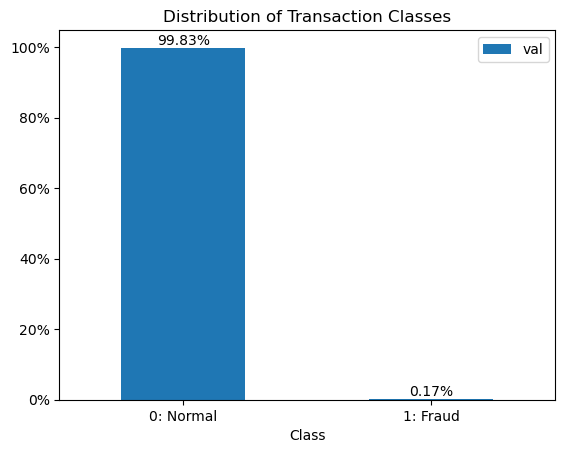

In [12]:
Labels = ["0: Normal", "1: Fraud"]

# Class_counts.plot(kind = 'bar', rot=0)
# plt.title("Distribution of Transaction Classes")
# plt.xticks([0,1], Labels)
# plt.xlabel("Class")
# plt.ylabel("Frequency");

import matplotlib.ticker as mtick
#convert to percentage labels
df = pd.DataFrame({'Class':Labels, 'val':Class_counts})
df['val'] = df['val'].apply(lambda x: (x/df['val'].sum())*100)
labels = df['val'].round(2).astype('str') + '%'
ax = df.plot.bar(x='Class', y='val', rot=0)
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter()) 
    ax.set_title('Distribution of Transaction Classes')

We can see the `Fraud` is only **0.17%** of all transactions.

#### 2.4.2.2 Feature correlation heatmap<a id='2.4.2.2'></a>

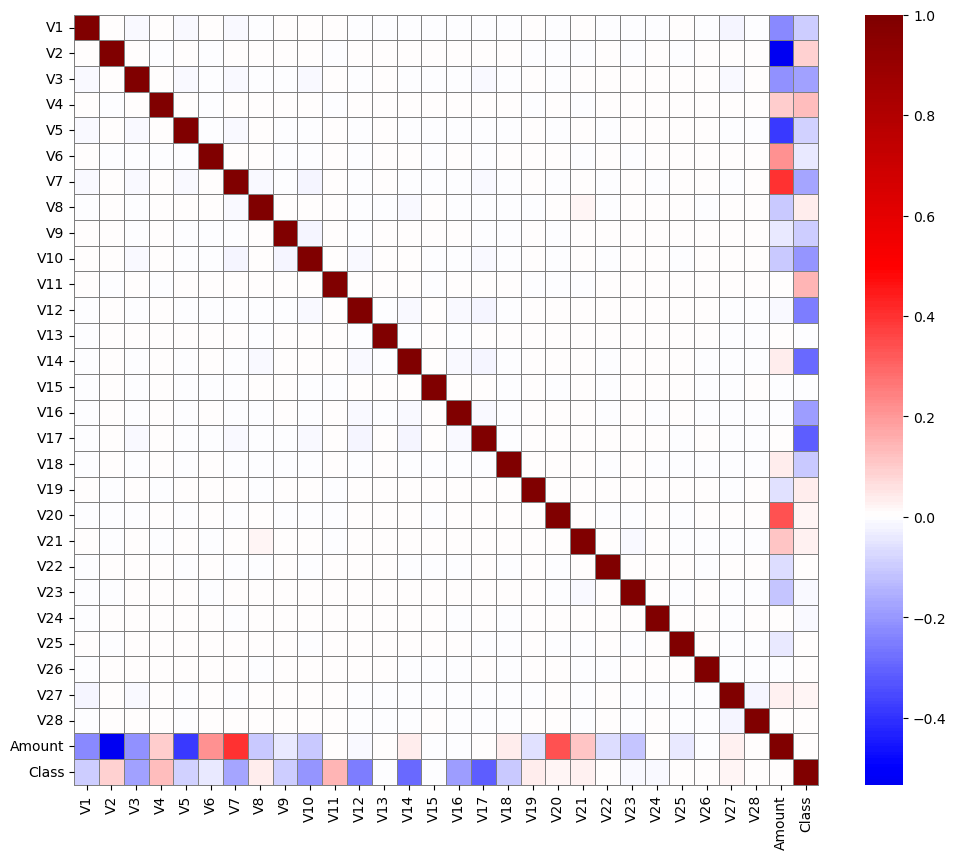

In [13]:
plt.subplots(figsize=(12,10))
sns.heatmap(data.drop('Time', axis=1).corr(), cmap='seismic', center=0., linewidths=0.5,
            linecolor='gray', clip_on=False);

Form the heatmap, we can see the features `V1` to `V28` are not correlated with each other because they are principal components obtained with PCA. `Class`/`Amount` has some positive or negtive correlation with some `V` features, while `Class` and `Amount` are not correlated.

Then we calculate the relatively high correlation coefficients:

In [14]:
data[['Time', 'V3', 'V5', 'V11', 'V22', 'V25']].corr().Time

Time    1.00
V3     -0.42
V5      0.17
V11    -0.25
V22     0.14
V25    -0.23
Name: Time, dtype: float64

In [15]:
data[['Amount', 'V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V20']].corr().Amount

Amount    1.00
V1       -0.23
V2       -0.53
V3       -0.21
V5       -0.39
V6        0.22
V7        0.40
V20       0.34
Name: Amount, dtype: float64

In [16]:
data[['Class', 'V3', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']].corr().Class

Class    1.00
V3      -0.18
V7      -0.17
V10     -0.21
V11      0.15
V12     -0.25
V14     -0.29
V16     -0.19
V17     -0.31
Name: Class, dtype: float64

**Highest correlations are:**

corr (Time, V3) = -0.42\
corr (Amount, V2) = -0.53\
corr (Amount, V7) = 0.4

The `V1` to `V28` PCA components don't have linear correlation with each other.

The `Class` column has some positive and negative correlations with the `V` features but has **No** linear correlation with `Time` and `Amount`.

#### 2.4.2.3 Scatterplots and boxplots of numeric features against Class<a id='2.4.2.3'></a>

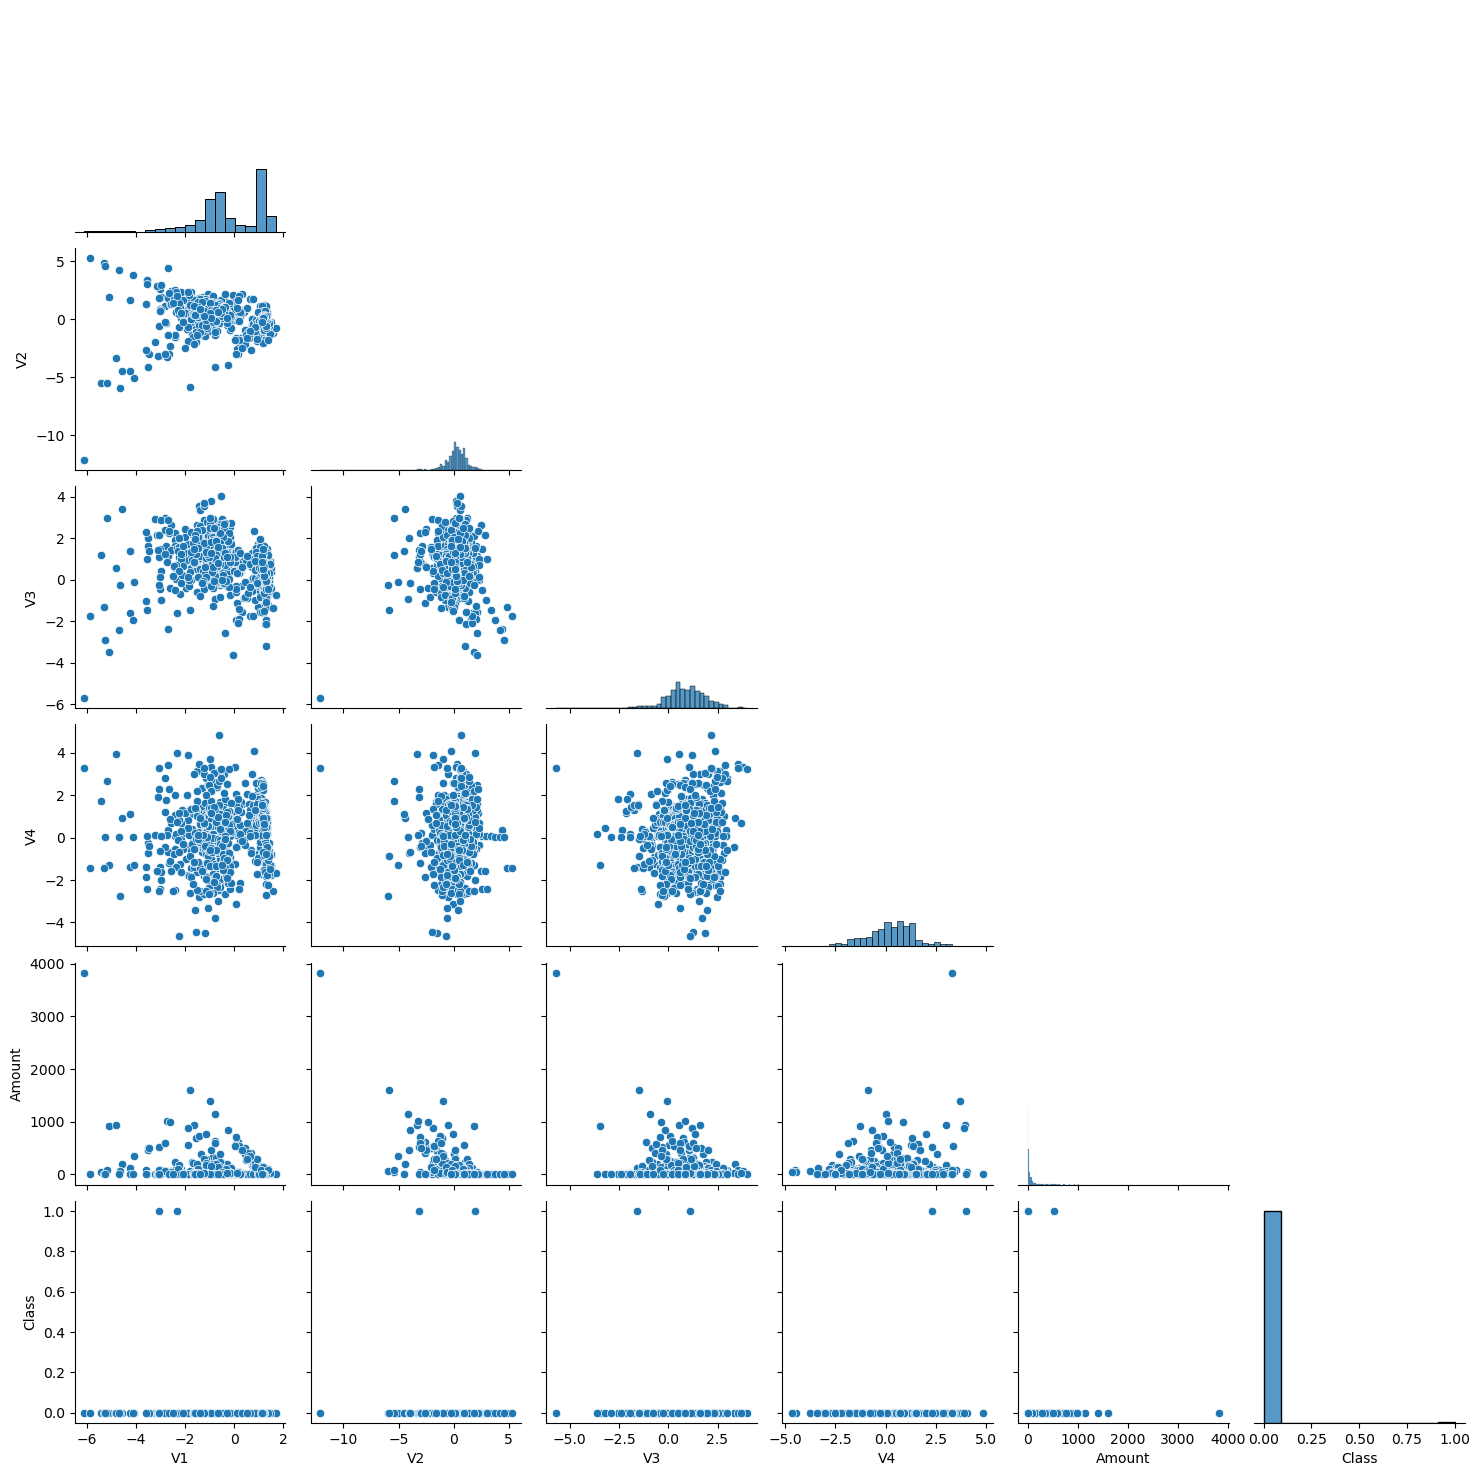

In [17]:
# Pair Plot: Class and certain features
sns.pairplot(data.loc[0:1000, ['V1', 'V2', 'V3', 'V4', 'Amount', 'Class']], corner=True)
plt.show()

In [18]:
# Define useful function to create scatterplots of Class against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.5)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Class', data=data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Class')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

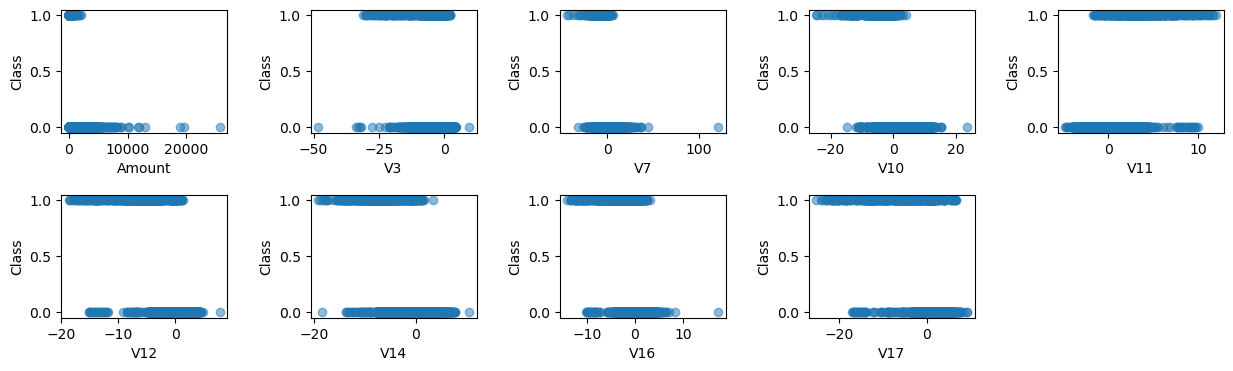

In [19]:
# Select several features that have relatively higher correlation with Class
features = ['Amount', 'V3', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']
scatterplots(features, ncol=5, figsize=(15, 4))

The `Class` column has:\
No coorrelation with `Amount`.\
Positive coorrelation with `V11`.\
Negtive correlation with other `V` features.

The box plots below also show these relationships.

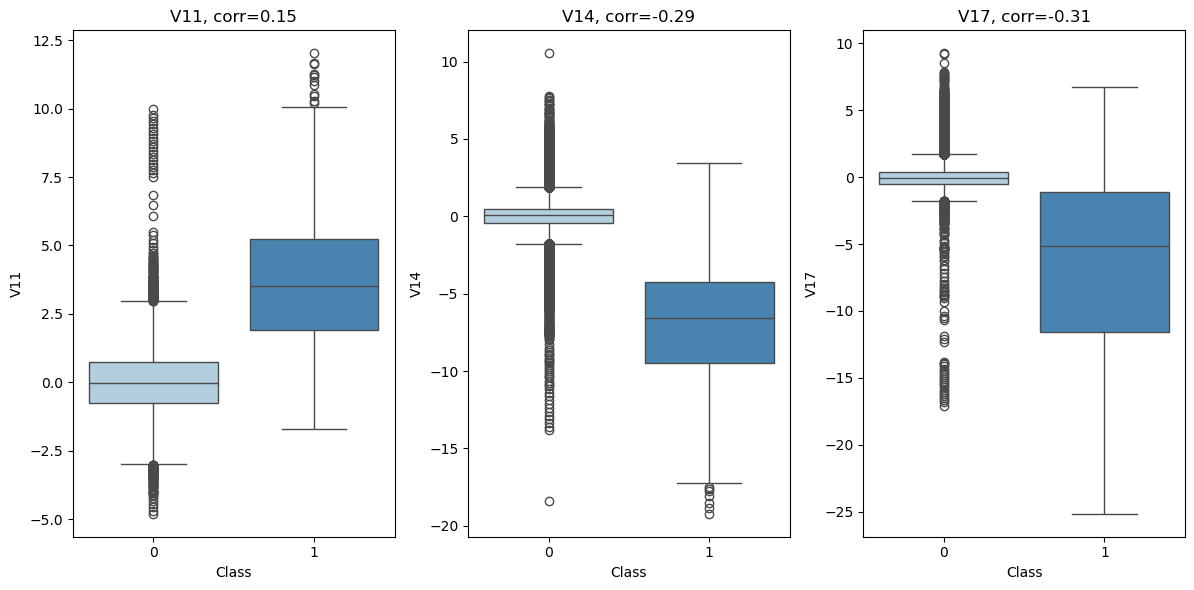

In [20]:
# Boxplots: Class - V features
corrs=data[['Class', 'V11', 'V14', 'V17']].corr().Class[1:]

plt.figure(figsize=(16, 6))
for i, feature in enumerate(['V11', 'V14', 'V17'], 1):
    plt.subplot(1, 4, i)
    sns.boxplot(x='Class', y=feature, data=data, hue='Class', legend=False, palette="Blues")
    plt.title(f'{feature}, corr={round(corrs.iloc[i-1],2)}')

plt.tight_layout()
plt.show()

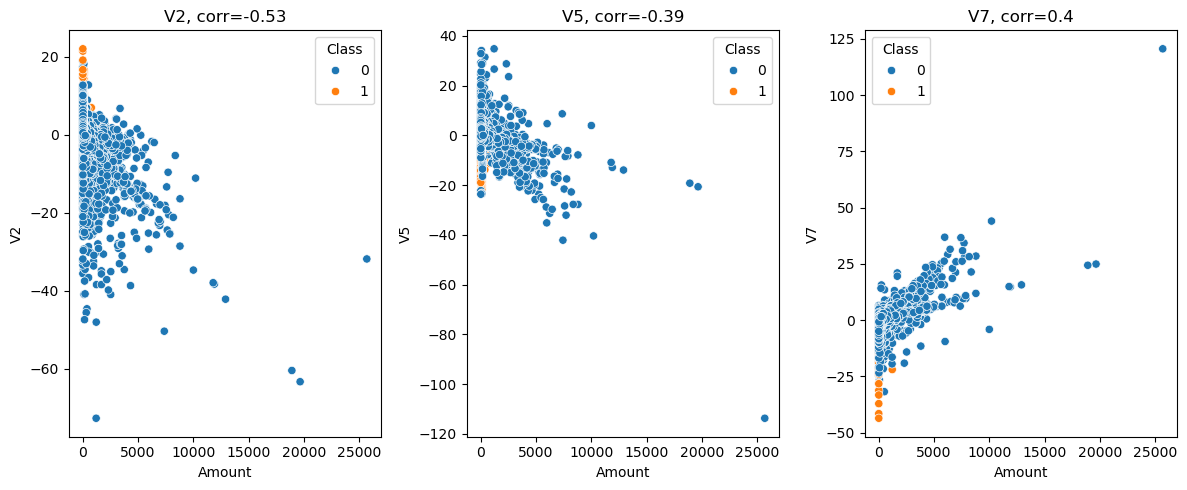

In [21]:
# Scatterplots: Amount - V features
corrs=data[['Amount', 'V2', 'V5', 'V7']].corr().Amount[1:]

plt.figure(figsize=(12, 5))
for i, feature in enumerate(['V2', 'V5', 'V7'], 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x='Amount', y=feature, data=data, hue='Class')
    plt.title(f'{feature}, corr={round(corrs.iloc[i-1],2)}')

plt.tight_layout()
plt.show()

The above scatterplots show that the `Amount` column has negative correlation with `V2` and `V5` and has positive correlation with `V7`.

## 2.5 K-Means Clustering<a id='2.5'></a>

In [22]:
# c for clustering, choose all features
c_data = data.drop(['Time', 'Class'], axis=1)
c_features = list(c_data.columns)

#### 1. Standard Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
 
c_data_scaled = std_scaler.fit_transform(c_data.to_numpy())
c_data_scaled = pd.DataFrame(c_data_scaled)

c_data_scaled.columns=c_data.columns.values
 
print("Scaled Dataset Using StandardScaler:")
c_data_scaled.head(3)

Scaled Dataset Using StandardScaler:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.70,-0.04,1.68,0.98,-0.25,0.35,0.19,0.08,0.33,0.09,...,0.33,-0.02,0.38,-0.18,0.11,0.25,-0.39,0.33,-0.07,0.24
1,0.61,0.16,0.11,0.32,0.04,-0.06,-0.07,0.07,-0.23,-0.15,...,-0.09,-0.31,-0.88,0.16,-0.56,0.32,0.26,-0.03,0.04,-0.34
2,-0.70,-0.81,1.17,0.27,-0.37,1.35,0.64,0.21,-1.38,0.19,...,0.68,0.34,1.07,1.46,-1.14,-0.63,-0.29,-0.14,-0.18,1.16


#### 2. Elbow Method: Chossing n_clusters - Best K

In [24]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

**Using scaled data:**

/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


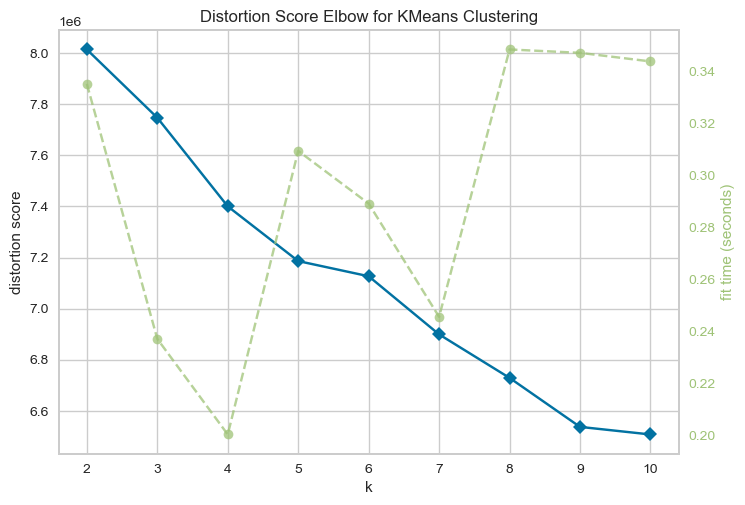

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10, n_init='auto', random_state=0),
                 k=(2, 11))

In [25]:
kelbow_visualizer(KMeans(random_state=0, n_init="auto"), c_data_scaled.to_numpy(), k=(2,11))

**Using original data:**

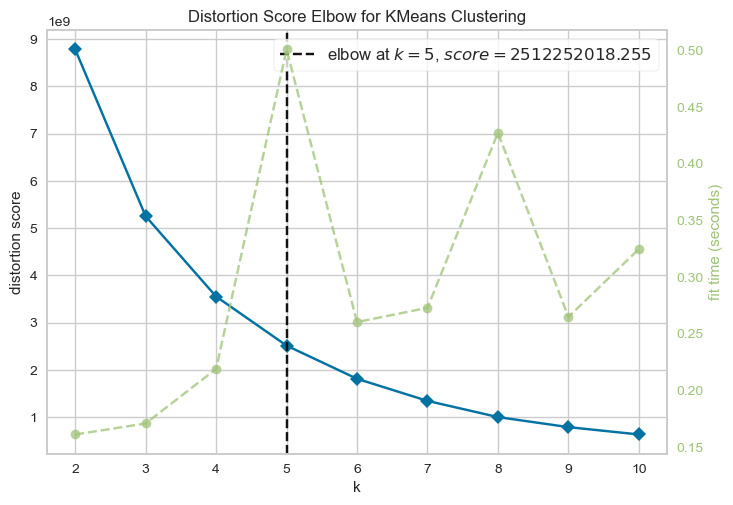

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10, n_init='auto', random_state=0),
                 k=(2, 11))

In [26]:
kelbow_visualizer(KMeans(random_state=0, n_init="auto"), c_data.to_numpy(), k=(2,11))

#### 3. K-Means Clustering with n_clusters = 5

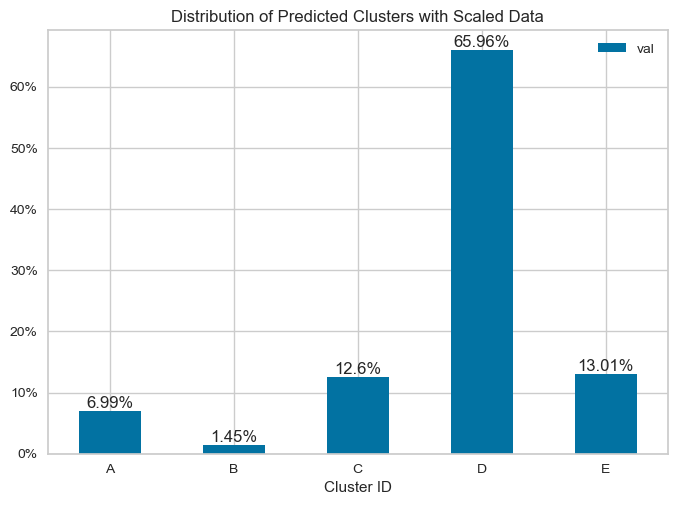

In [27]:
clustering_kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto")
c_data_scaled['Cluster'] = clustering_kmeans.fit_predict(c_data_scaled)

Cluster_counts = np.bincount(c_data_scaled['Cluster'])

Labels = ['A', 'B', 'C', 'D', 'E']

import matplotlib.ticker as mtick
#convert to percentage labels
df = pd.DataFrame({'Cluster ID':Labels, 'val':Cluster_counts})
df['val'] = df['val'].apply(lambda x: (x/df['val'].sum())*100)
labels = df['val'].round(2).astype('str') + '%'
ax = df.plot.bar(x='Cluster ID', y='val', rot=0)
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter()) 
    ax.set_title('Distribution of Predicted Clusters with Scaled Data')

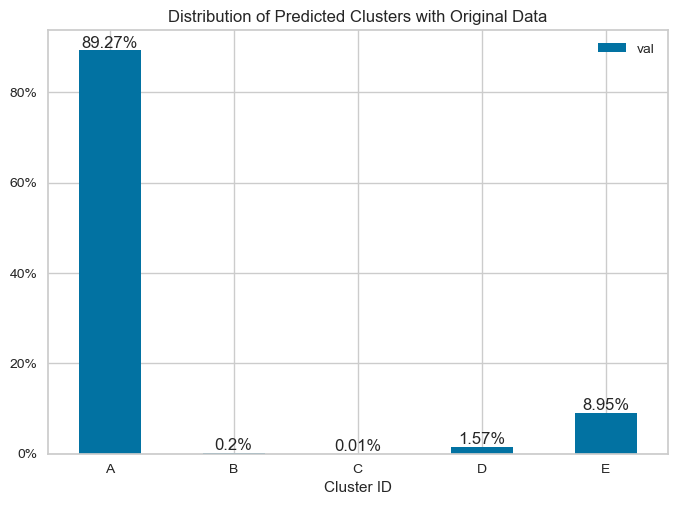

In [28]:
clustering_kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto")
c_data['Cluster'] = clustering_kmeans.fit_predict(c_data)

Cluster_counts = np.bincount(c_data['Cluster'])

Labels = ['A', 'B', 'C', 'D', 'E']

import matplotlib.ticker as mtick
#convert to percentage labels
df = pd.DataFrame({'Cluster ID':Labels, 'val':Cluster_counts})
df['val'] = df['val'].apply(lambda x: (x/df['val'].sum())*100)
labels = df['val'].round(2).astype('str') + '%'
ax = df.plot.bar(x='Cluster ID', y='val', rot=0)
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter()) 
    ax.set_title('Distribution of Predicted Clusters with Original Data')

#### 4. Using PCA to visualizing Clustering

In [29]:
# Replace the cluster names
mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E'}
c_data = c_data.replace({'Cluster': mapping})
c_data_scaled = c_data_scaled.replace({'Cluster': mapping})

In [30]:
# Add Class
c_data['Class'] = data['Class']
c_data_scaled['Class'] = data['Class']

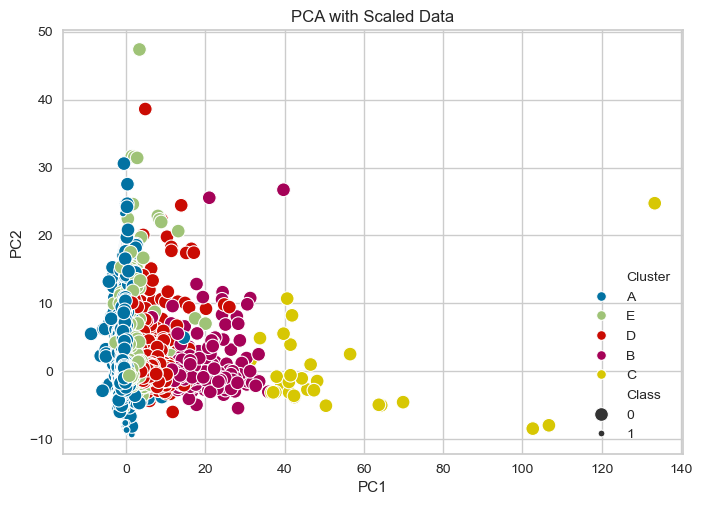

In [31]:
from sklearn.decomposition import PCA

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(c_data_scaled.drop(['Cluster', 'Class'], axis=1))
results = pd.DataFrame(reduced_data,columns=['PC1','PC2'])

sns.scatterplot(x="PC1", y="PC2", hue=c_data['Cluster'], size=data['Class'], data=results)
plt.title('PCA with Scaled Data')
plt.show()

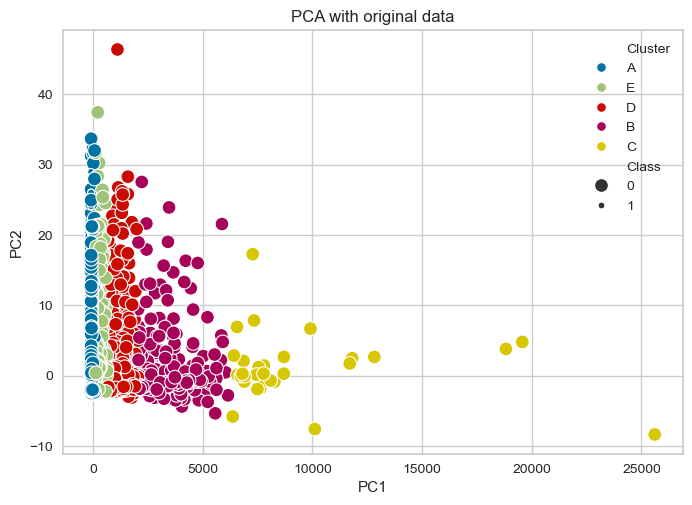

In [32]:
from sklearn.decomposition import PCA

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(c_data.drop(['Cluster', 'Class'], axis=1))
results = pd.DataFrame(reduced_data,columns=['PC1','PC2'])

sns.scatterplot(x="PC1", y="PC2", hue=c_data['Cluster'], size=data['Class'], data=results)
plt.title('PCA with original data')
plt.show()

## 2.6 t-SNE<a id='2.6'></a>

In [51]:
from sklearn.manifold import TSNE

X = c_data.drop(['Cluster', 'Class'], axis=1)
 
# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(X)
tsne_result.shape
# (1000, 2)
# Two dimensions for each of our images
 
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

KeyboardInterrupt: 

## 2.7 Summary<a id='2.7'></a>

1. Data Wrangling

There are **no** missing values in the credit card dataset.

Our **target** is the `Class` column, including 492 frauds (Class=1) out of 284,807 transactions. All other transactions are normal (Class=0).\
The dataset is highly unbalanced, the positive class (frauds) account for only 0.172% of all transactions.

The features are all **numeric**.\
Features `V1`, `V2`, … `V28` are the principal components obtained after applying with PCA.\
The only features which have not been transformed with PCA are `Time` and `Amount`. 

2. EDA

(1) Correlation

Since features `V1` to `V28` are transformed with PCA, they do not have linear correlation with each other.

The `Class` column has some positive and negative correlations with some `V` features but has no correlation with `Time` and `Amount`.

(2) Clustering

Choosing `V28` as the feature for clustering, the result has the smallest percentage (0.05%) for `Cluster 1`. However, from the scatterplot, `Cluster 1` is incosistent with `Class 1` (Fruad).

Note that if we choose `Amount` as a feature for clustering, `Cluster 1` always accounts for 1.84%. It means the `Amount` feature dominates the clustering.